# 輸出雨量資料(raindata.csv)

In [1]:
import pandas as pd

# every hour
url = "http://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=466920&stname=%25E8%2587%25BA%25E5%258C%2597&datepicker=2015-"
monthOf2015 = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
f = open('raindata.csv', 'w')
for i in range(0, 12):
    month = str(i+1).zfill(2)
    for j in range(1, monthOf2015[i]+1):
        day = str(j).zfill(2)
        date = month + '-' + day
        print(date)

        data = pd.read_html(url + date)[1]
        data = pd.DataFrame(data)
        data = data.drop(data.index[[0, 1]])
        data = data.drop(data.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14]], axis=1)
        data = data.replace('T', 0.0)
        f.write(month + day + ',')
        rain = []
        for k in data.values:
            rain.append(float(k[0]))
            f.write(str(float(k[0])))
            f.write(',')
        if(sum(rain) < 2.5):
            f.write('F')
        else:
            f.write('T')
        f.write('\n')
f.close()


01-01
01-02
01-03
01-04
01-05
01-06
01-07
01-08
01-09
01-10
01-11
01-12
01-13
01-14
01-15
01-16
01-17
01-18
01-19
01-20
01-21
01-22
01-23
01-24
01-25
01-26
01-27
01-28
01-29
01-30
01-31
02-01
02-02
02-03
02-04
02-05
02-06
02-07
02-08
02-09
02-10
02-11
02-12
02-13
02-14
02-15
02-16
02-17
02-18
02-19
02-20
02-21
02-22
02-23
02-24
02-25
02-26
02-27
02-28
03-01
03-02
03-03
03-04
03-05
03-06
03-07
03-08
03-09
03-10
03-11
03-12
03-13
03-14
03-15
03-16
03-17
03-18
03-19
03-20
03-21
03-22
03-23
03-24
03-25
03-26
03-27
03-28
03-29
03-30
03-31
04-01
04-02
04-03
04-04
04-05
04-06
04-07
04-08
04-09
04-10
04-11
04-12
04-13
04-14
04-15
04-16
04-17
04-18
04-19
04-20
04-21
04-22
04-23
04-24
04-25
04-26
04-27
04-28
04-29
04-30
05-01
05-02
05-03
05-04
05-05
05-06
05-07
05-08
05-09
05-10
05-11
05-12
05-13
05-14
05-15
05-16
05-17
05-18
05-19
05-20
05-21
05-22
05-23
05-24
05-25
05-26
05-27
05-28
05-29
05-30
05-31
06-01
06-02
06-03
06-04
06-05
06-06
06-07
06-08
06-09
06-10
06-11
06-12
06-13
06-14
06-15
06-1

# 產生2015年每日台北站點車流量資料(day/0101~1231.csv)

In [4]:
# 產生每日站點車流量資料

f = open('youbikeStation.csv', 'r', encoding='utf8')
station = {}
taipei = ['信義區','大安區','中山區','松山區','南港區','中正區','萬華區','文山區','大同區','士林區','內湖區','北投區']
line = f.readline().strip()
while True:
    line = f.readline().strip()
    if line == '':
        break
    lineList = line.split(',')
    if lineList[2] in taipei:
        station.setdefault(lineList[1], '')
f.close()

monthOf2015 = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

for i in range(0, 12): 
    month = str(i+1).zfill(2)
    for j in range(1, monthOf2015[i]+1): 
        day = str(j).zfill(2)
        print(month + day)
        try:
            fr = open('data/youbike_2015' + month + day + '.csv', 'r', encoding='utf8')
        except:
            print('Not Found')
            continue
        temp = []
        line = fr.readline().strip()
        while True:
            line = fr.readline().strip()
            if line == '':
                break
            lineList = line.split(',')
            if lineList[2] in station:
                temp.append(str(int(lineList[1][11:13])) + ',' + lineList[2])
        fr.close()

        for k in temp:
            station[k.split(',')[1]] += k.split(',')[0] + ','

        temp2 = []
        for m in station:
            temp2 = []
            if station[m] != '':
                for n in range(0, 24):
                    temp2.append(station[m].split(',').count(str(n)))
            station[m] = temp2

        fw = open('day/' + month + day + '.csv', 'w', encoding='utf8')
        for o in station:
            fw.write(o)
            fw.write(',')
            if station[o] == []:
                fw.write('0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,')
                fw.write('\n')
                continue
            for p in station[o]:
                fw.write(str(p))
                fw.write(',')
            fw.write('\n')
        fw.close()
        for o in station:
            station[o] = ''


0101
0102
0103
0104
0105
0106
0107
0108
0109
0110
0111
0112
0113
0114
0115
0116
0117
0118
0119
0120
0121
0122
0123
0124
0125
0126
0127
0128
0129
0130
0131
0201
0202
0203
0204
0205
0206
0207
0208
0209
0210
0211
0212
0213
0214
0215
0216
0217
0218
0219
0220
0221
0222
0223
0224
0225
0226
0227
0228
0301
0302
0303
0304
0305
0306
0307
0308
0309
0310
0311
0312
0313
0314
0315
0316
0317
0318
Not Found
0319
0320
0321
0322
0323
0324
0325
0326
0327
0328
0329
0330
0331
0401
0402
0403
0404
0405
0406
0407
0408
0409
0410
0411
0412
0413
0414
0415
0416
0417
0418
0419
0420
0421
0422
0423
0424
0425
0426
0427
0428
0429
0430
0501
0502
0503
0504
0505
0506
0507
0508
0509
0510
0511
0512
0513
0514
0515
0516
0517
0518
0519
0520
0521
0522
0523
0524
0525
0526
0527
0528
0529
0530
0531
0601
0602
0603
0604
0605
0606
0607
0608
0609
0610
0611
0612
0613
0614
0615
0616
0617
0618
0619
0620
0621
0622
0623
0624
0625
0626
0627
0628
0629
0630
0701
0702
0703
0704
0705
0706
0707
0708
0709
0710
0711
0712
0713
0714
0715
0716
0717


# 產生沒下雨時平均借用量(NoRainAverage.csv)

In [5]:
# 產生沒下雨時平均車流量
for i in station:
    station[i] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

count = 0
f1 = open('raindata.csv', 'r', encoding='utf8')
while True:
    line1 = f1.readline().strip()
    if line1 == '':
        break
    if line1[-1] == 'F':
        f2 = open('day/' + str(line1[0:4]) + '.csv', 'r', encoding='utf8')
        while True:
            line2 = f2.readline().strip()
            if line2 == '':
                break
            line2list = line2.split(',')
            for i in range(0, 24):
                station[line2list[0]][i] += int(line2list[i+1])
        count += 1
        f2.close()
f1.close()

removeList = []
for i in station:
    if station[i] == [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0]:
        print(i)
        removeList.append(i)

for i in removeList:
    station.pop(i)

for i in station:
    for j in range(0, 24):
        station[i][j] = round(station[i][j] / count, 2)

f = open('NoRainAverage.csv', 'w', encoding='utf8')

for i in station:
    f.write(i)
    f.write(',')
    for j in station[i]:
        f.write(str(j))
        f.write(',')
    f.write('\n')
f.close()



林森長春路口
華齡公園
安泰街83巷
富台公園
市立圖書館葫蘆堵分館
捷運忠孝新生站(3號出口)
社正公園
臺北花市
忠孝東路三段217巷口
松江公園
瑠公公園
八德中坡路口
西本願寺廣場
關渡宮
文山第二行政中心
捷運萬芳社區站
忠順區民活動中心
仁愛安和路口
芝山國小
三軍總醫院
牯嶺公園
健康新城
中山中正路口
民權瑞光路口
捷運內湖站(1號出口)
朱崙商場
敦親公園
華聲公園
龍山國小
南港高工
光復南路22巷口
南港車站(興華路)
國立故宮博物院
捷運松山站(3號出口)
復興市民路口
捷運辛亥站
捷運信義安和站(4號出口)
中華桂林路口
麗山高中
至善臨溪路口
湖光國宅
新明路321巷口
立功立德路口
濟南紹興路口
捷運古亭站(6號出口)
社子公園
南港車站(忠孝東路)
錦德公園
三興公園
捷運忠義站
永安藝文館-表演36房
培英公園
國立臺北大學(臺北校區)
中央北路四段540巷口
芝山抽水站
木柵光輝路口
瑞湖陽光街口
捷運關渡站
關渡自然公園
士林新天地
太原五原路口
洲子一號公園
萬華國中
長沙公園
南京建國路口
捷運信義安和站(1號出口)
永欣綠地
喬治工商
秀山區民活動中心
碧山公園
萬和二號公園
新生公園
敦化長春路口
南京遼寧街口
自來水園區
雨農國小
大安運動中心
松山高中
內政部營建署
明美公園
大理高中
林口公園
信義基隆路口
金華公園
扶輪親恩公園
基隆路一段101巷口
捷運中山國中站
木柵公園
中山堂
螢橋國小
捷運南京三民站(3號出口)
市民東興路口
敦北公園
第二果菜批發市場
聯合醫院中興院區
重慶南海路口
北安大直街口


In [37]:
print(len(station))

210


# 產生分群用資料(使用下雨日平均借用量)

In [1]:
# 產生分群用資料
f = open('NoRainAverage.csv', 'r', encoding='utf8')
NoRainStation = {}
while True:
    line = f.readline().strip()
    if line == '':
        break
    lineList = line.split(',')
    NoRainStation.setdefault(lineList[0], lineList[1:25])
f.close()

station = NoRainStation.copy()
for i in station:
    station[i] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

count = 0
f1 = open('raindata.csv', 'r', encoding='utf8')
while True:
    line1 = f1.readline().strip()
    if line1 == '':
        break
    if line1[-1] == 'T':
        count+=1
        f2 = open('day/' + str(line1[0:4]) + '.csv', 'r', encoding='utf8')
        while True:
            line2 = f2.readline().strip()
            if line2 == '':
                break
            line2list = line2.split(',')
            if line2list[0] not in station:
                continue
            line1List = line1.split(',')
            for i in range(0, 24):
                station[line2list[0]][i] += float(line2list[i + 1])
        f2.close()
f1.close()

for i in station:
    for j in range(0, 24):
        station[i][j] /= count

print(station['南港公園'])
print(NoRainStation['南港公園'])
classification = NoRainStation.copy()

for i in classification:
    for j in range(0, 24):
        classification[i][j] = round(float(classification[i][j]) - station[i][j], 2)
print(classification['南港公園'])
# f = open('ForClassification.csv', 'w')
# for i in station:
#     f.write(i)
#     f.write(',')
#     for j in station[i]:
#         f.write(str(j))
#         f.write(',')
#     f.write('\n')
# f.close()

[0.5263157894736842, 0.3157894736842105, 0.11578947368421053, 0.10526315789473684, 0.1368421052631579, 1.4526315789473685, 3.610526315789474, 4.2105263157894735, 6.326315789473684, 4.378947368421053, 2.6736842105263157, 3.221052631578947, 3.1789473684210527, 3.1578947368421053, 2.8842105263157896, 3.1157894736842104, 3.4842105263157896, 4.4526315789473685, 3.8210526315789473, 2.442105263157895, 1.9789473684210526, 1.831578947368421, 1.2421052631578948, 0.9473684210526315]
['0.64', '0.42', '0.25', '0.09', '0.19', '2.07', '5.54', '6.85', '10.23', '6.59', '4.82', '4.73', '4.26', '4.52', '4.91', '5.2', '5.47', '6.74', '6.27', '4.3', '3.68', '3.46', '2.17', '1.3']
[0.11, 0.1, 0.13, -0.02, 0.05, 0.62, 1.93, 2.64, 3.9, 2.21, 2.15, 1.51, 1.08, 1.36, 2.03, 2.08, 1.99, 2.29, 2.45, 1.86, 1.7, 1.63, 0.93, 0.35]


In [2]:
classification['南港公園']

[0.11,
 0.1,
 0.13,
 -0.02,
 0.05,
 0.62,
 1.93,
 2.64,
 3.9,
 2.21,
 2.15,
 1.51,
 1.08,
 1.36,
 2.03,
 2.08,
 1.99,
 2.29,
 2.45,
 1.86,
 1.7,
 1.63,
 0.93,
 0.35]

In [3]:
NoRainStation['南港公園']

[0.11,
 0.1,
 0.13,
 -0.02,
 0.05,
 0.62,
 1.93,
 2.64,
 3.9,
 2.21,
 2.15,
 1.51,
 1.08,
 1.36,
 2.03,
 2.08,
 1.99,
 2.29,
 2.45,
 1.86,
 1.7,
 1.63,
 0.93,
 0.35]

In [4]:
station['南港公園']

[0.5263157894736842,
 0.3157894736842105,
 0.11578947368421053,
 0.10526315789473684,
 0.1368421052631579,
 1.4526315789473685,
 3.610526315789474,
 4.2105263157894735,
 6.326315789473684,
 4.378947368421053,
 2.6736842105263157,
 3.221052631578947,
 3.1789473684210527,
 3.1578947368421053,
 2.8842105263157896,
 3.1157894736842104,
 3.4842105263157896,
 4.4526315789473685,
 3.8210526315789473,
 2.442105263157895,
 1.9789473684210526,
 1.831578947368421,
 1.2421052631578948,
 0.9473684210526315]

In [5]:
classification

{'三張犁': [2.13,
  0.94,
  0.46,
  0.52,
  0.58,
  1.07,
  4.29,
  7.95,
  13.17,
  9.15,
  5.07,
  3.75,
  3.09,
  4.89,
  5.12,
  5.96,
  7.43,
  8.95,
  12.35,
  9.72,
  7.2,
  8.19,
  5.82,
  3.68],
 '三民公園': [0.42,
  0.19,
  0.08,
  0.17,
  0.05,
  0.33,
  1.73,
  3.14,
  2.05,
  1.65,
  1.25,
  0.96,
  0.98,
  1.02,
  1.21,
  1.35,
  2.36,
  2.98,
  2.96,
  3.39,
  2.45,
  2.28,
  1.53,
  0.79],
 '世貿三館': [0.81,
  0.14,
  0.24,
  0.13,
  0.1,
  0.14,
  0.55,
  1.87,
  3.84,
  1.75,
  1.15,
  1.52,
  3.16,
  2.89,
  3.19,
  4.49,
  4.19,
  5.69,
  5.62,
  2.49,
  2.81,
  3.13,
  2.35,
  0.47],
 '世貿二館': [1.08,
  0.32,
  0.26,
  0.55,
  0.4,
  0.72,
  0.41,
  1.34,
  2.68,
  2.93,
  3.46,
  5.17,
  10.95,
  11.77,
  15.52,
  17.16,
  19.2,
  21.85,
  24.21,
  18.76,
  12.99,
  4.05,
  1.15,
  1.03],
 '中山行政中心': [0.58,
  0.04,
  0.12,
  0.07,
  0.16,
  0.6,
  2.16,
  4.83,
  5.54,
  4.13,
  3.09,
  2.32,
  2.23,
  2.41,
  4.19,
  3.29,
  4.25,
  5.52,
  5.6,
  4.6,
  3.57,
  3.03,
  2.71,

In [6]:
len(classification)

208

# 相關係數

In [7]:
import pandas as pd
c = pd.DataFrame(classification)

In [8]:
c

,三張犁,三民公園,世貿三館,世貿二館,中山行政中心,中崙高中,中強公園,中正基河路口,中研公園,五常公園,...,酒泉延平路口,金山市民路口,金山愛國路口,金瑞公園(金龍路),開封西寧路口,青年公園3號出口,饒河夜市,麗山國小,龍江南京路口,龍門廣場
0,2.13,0.42,0.81,1.08,0.58,1.57,0.88,0.39,0.36,1.05,...,0.14,0.55,0.24,0.12,1.51,0.52,4.29,0.11,1.17,1.35
1,0.94,0.19,0.14,0.32,0.04,0.81,0.59,0.01,0.06,0.60,...,-0.02,0.45,0.39,0.09,1.61,0.33,1.54,0.05,0.37,1.12
2,0.46,0.08,0.24,0.26,0.12,0.52,0.19,0.08,0.03,0.15,...,0.05,0.30,-0.03,-0.01,0.56,0.23,0.76,0.03,0.45,0.54
3,0.52,0.17,0.13,0.55,0.07,0.67,0.23,-0.01,0.05,0.06,...,0.09,0.08,0.00,-0.02,0.08,0.22,0.52,0.07,0.20,0.04
4,0.58,0.05,0.10,0.40,0.16,0.31,0.10,0.18,0.11,0.23,...,0.13,0.06,0.23,-0.02,0.37,0.07,0.49,-0.01,0.12,0.91
5,1.07,0.33,0.14,0.72,0.60,0.69,0.36,0.40,0.27,0.25,...,0.56,0.30,0.28,0.04,0.57,0.97,0.76,0.47,0.74,1.09
6,4.29,1.73,0.55,0.41,2.16,2.36,1.67,1.17,3.19,2.08,...,1.80,0.41,0.79,1.01,1.53,3.10,3.34,1.85,1.50,2.15
7,7.95,3.14,1.87,1.34,4.83,5.34,4.27,2.12,3.50,4.32,...,3.05,1.30,3.66,1.56,2.51,6.83,5.72,2.59,3.74,6.55
8,13.17,2.05,3.84,2.68,5.54,7.37,5.94,3.79,4.55,2.73,...,4.55,1.40,5.60,1.18,3.04,5.21,5.06,3.36,5.24,7.66
9,9.15,1.65,1.75,2.93,4.13,4.91,4.81,2.42,2.55,1.69,...,1.86,1.05,3.93,1.07,3.24,5.48,3.61,1.95,3.58,6.75


In [9]:
d = c.corr()
d

,三張犁,三民公園,世貿三館,世貿二館,中山行政中心,中崙高中,中強公園,中正基河路口,中研公園,五常公園,...,酒泉延平路口,金山市民路口,金山愛國路口,金瑞公園(金龍路),開封西寧路口,青年公園3號出口,饒河夜市,麗山國小,龍江南京路口,龍門廣場
三張犁,1.000000,0.874374,0.765473,0.542802,0.937531,0.884910,0.803754,0.856649,0.874724,0.831324,...,0.907598,0.597102,0.807188,0.781991,0.802621,0.850053,0.723642,0.920910,0.824341,0.727817
三民公園,0.874374,1.000000,0.701299,0.608396,0.893758,0.891195,0.780540,0.851009,0.901809,0.943836,...,0.864823,0.656826,0.742853,0.866082,0.801705,0.908628,0.805019,0.927125,0.791861,0.782848
世貿三館,0.765473,0.701299,1.000000,0.848212,0.827151,0.910750,0.905004,0.908910,0.815303,0.623823,...,0.737185,0.888998,0.928732,0.693111,0.886786,0.785144,0.551824,0.766885,0.905171,0.903561
世貿二館,0.542802,0.608396,0.848212,1.000000,0.661120,0.841430,0.827915,0.807584,0.664754,0.448845,...,0.488696,0.956400,0.736845,0.634745,0.866416,0.674603,0.466408,0.612254,0.848636,0.949647
中山行政中心,0.937531,0.893758,0.827151,0.661120,1.000000,0.922697,0.901168,0.908614,0.934618,0.825149,...,0.902191,0.700139,0.871691,0.866159,0.843657,0.939084,0.622155,0.920240,0.881991,0.792218
中崙高中,0.884910,0.891195,0.910750,0.841430,0.922697,1.000000,0.927312,0.965718,0.906209,0.788680,...,0.826088,0.871207,0.886051,0.835930,0.943656,0.902306,0.733950,0.901795,0.934671,0.950276
中強公園,0.803754,0.780540,0.905004,0.827915,0.901168,0.927312,1.000000,0.933032,0.866501,0.668785,...,0.770393,0.871378,0.909301,0.886101,0.866634,0.918285,0.487771,0.807419,0.889607,0.883475
中正基河路口,0.856649,0.851009,0.908910,0.807584,0.908614,0.965718,0.933032,1.000000,0.926746,0.753971,...,0.870225,0.845556,0.911945,0.814224,0.892219,0.903364,0.658303,0.894459,0.906713,0.899989
中研公園,0.874724,0.901809,0.815303,0.664754,0.934618,0.906209,0.866501,0.926746,1.000000,0.817176,...,0.905452,0.700823,0.878939,0.828141,0.806568,0.893531,0.643675,0.943401,0.886214,0.791023
五常公園,0.831324,0.943836,0.623823,0.448845,0.825149,0.788680,0.668785,0.753971,0.817176,1.000000,...,0.861950,0.543416,0.640705,0.794075,0.695218,0.838706,0.774686,0.866521,0.669960,0.655953


# 使用KMeans做分群(1~10群)，輸出分群資訊csv

In [15]:
from sklearn.cluster import KMeans
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++')
    y_pred = km.fit_predict(d)
    f = open(str(i) + 'C.csv', 'w')
    count = 0
    for j in d:
        f.write(j)
        f.write(',')
        f.write(str(y_pred[count]+1))
        f.write('\n')
        count+=1
    f.close()
    print(count)

208
208
208
208
208
208
208
208
208
208


# 輸出群組資訊(group.txt)

In [16]:
# 產生group.txt
for i in range(1,11):
    f = open(str(i) + 'C.csv', 'r')
    temp = {}
    for j in range(1, i+1):
        temp.setdefault(str(j), [])
    while True:
        line = f.readline().strip()
        if line == '':
            break
        lineList = line.split(',')
        temp[lineList[1]].append(lineList[0])
    f.close()
    
    print(len(temp))
    
    f = open(str(i) + 'C/group.txt', 'w')
    for j in range(1, i+1):
        f.write(str(j))
        f.write(',')
        for k in temp[str(j)]:
            f.write(k)
            f.write(',')
        f.write('\n')
    f.close()


1
2
3
4
5
6
7
8
9
10


# 輸出NNinput.csv (格式 雨量:借用下降量)

In [5]:
# every hour rain:reduce
f = open('NoRainAverage.csv', 'r', encoding='utf8')
NoRainStation = {}
while True:
    line = f.readline().strip()
    if line == '':
        break
    lineList = line.split(',')
    NoRainStation.setdefault(lineList[0], lineList[1:25])
f.close()

station = NoRainStation.copy()
for i in station:
    station[i] = []

f1 = open('raindata.csv', 'r', encoding='utf8')
while True:
    line1 = f1.readline().strip()
    if line1 == '':
        break
    if line1[-1] == 'T':
        f2 = open('day/' + str(line1[0:4]) + '.csv', 'r', encoding='utf8')
        while True:
            line2 = f2.readline().strip()
            if line2 == '':
                break
            line2list = line2.split(',')
            if line2list[0] not in station:
                continue
            line1List = line1.split(',')
            for i in range(0, 24):
                if float(line1List[i+1]) >= 0.5:
                    temp = round(float(NoRainStation[line2list[0]][i]) - float(line2list[i+1]), 2)
                    item = line1List[i+1] + ':' + str(temp)
                    station[line2list[0]].append(item)
        f2.close()
f1.close()

f = open('NNinput.csv', 'w')
for i in station:
    f.write(i)
    f.write(',')
    for j in station[i]:
        f.write(j)
        f.write(',')
    f.write('\n')
f.close()


# 產生XY (csv)

In [24]:
# 產生XY
for i in range(1, 11):
    f = open(str(i) + 'C.csv', 'r')
    Classification = {}
    while True:
        line = f.readline().strip()
        if line == '':
            break
        lineList = line.split(',')
        Classification.setdefault(lineList[0], lineList[1])
    f.close()

    for o in range(1, i+1):
        temp = []
        input = []
        output = []
        for j in Classification:
            if Classification[j] == str(o):
                temp.append(j)
        print(len(temp))
        f = open('NNinput.csv', 'r')
        while True:
            line = f.readline().strip()
            if line == '':
                break
            lineList = line.split(',')
            if lineList[0] in temp:
                for k in range(1, len(lineList)-1):
                    inout = lineList[k].split(':')
                    input.append(inout[0])
                    output.append(inout[1])
        f.close()
        print(len(input))
        print(len(output))
        print(temp)
        f = open(str(i) + 'C/C' + str(o) + '.csv', 'w')
        f.write('rain')
        f.write(',')
        f.write('reduce')
        f.write('\n')
        for j, k in zip(input, output):
            f.write(j)
            f.write(',')
            f.write(k)
            f.write('\n')
        f.close()


208
124592
124592
['捷運景美站', '仁愛逸仙路口', '捷運劍潭站(2號出口)', '捷運大安站', '臺灣師範大學(圖書館)', '臺北市立景美女中', '台北花木批發市場', '臺大資訊大樓', '捷運士林站(2號出口)', '福華商場', '華西公園', '榮星花園', '永吉松信路口', '五常公園', '臺北醫學大學', '大業大同街口', '金瑞公園(金龍路)', '建國和平路口', '撫順公園', '捷運龍山寺站(1號出口)', '考試院', '林安泰古厝', '台北市政府', '士林運動中心', '市民廣場', '捷運大橋頭站(2號出口)', '仁愛延吉街口', '信義廣場(台北101)', '民生敦化路口', '華山文創園區', '和平重慶路口', '捷運小南門站(1號出口)', '福林公園', '北投運動中心', '延平國宅', '南港世貿公園', '金山市民路口', '捷運劍南路站(2號出口)', '圓環站', '清江國小', '青年公園3號出口', '天母運動公園', '市民林森路口', '西園艋舺路口', '社教館', '捷運市政府站(3號出口)', '麗山國小', '捷運行天宮站(1號出口)', '捷運六張犁站', '植物園', '仁愛醫院', '興豐公園', '三民公園', '新湖國小', '林森公園', '臺北轉運站', '捷運西門站(3號出口)', '捷運麟光站2號出口', '中研公園', '捷運國父紀念館站(2號出口)', '民生活動中心', '臺北市立大學', '新東公園', '樹德公園', '捷運北門站(3號出口)', '國立政治大學', '新生長春路口', '台北市災害應變中心', '捷運葫洲站(1號出口)', '捷運古亭站(2號出口)', '龍江南京路口', '捷運中山站(4號出口)', '大豐公園', '捷運永春站(2號出口)', '東園國小', '蘭雅公園', '捷運行天宮站(3號出口)', '臥龍樂業街口', '民權運動公園', '捷運動物園站(2號出口)', '復華花園新城', '捷運東門站(4號出口)', '中正基河路口', '東新國小', '瑞光港墘路口', '福安國中', '建國長春路口', '蔣渭水紀念公園', '向陽南港路口', '捷運松江南京站(7號出口)', '世貿三館', '萬

48
28752
28752
['臺灣師範大學(圖書館)', '臺大資訊大樓', '福華商場', '建國和平路口', '林安泰古厝', '台北市政府', '市民廣場', '信義廣場(台北101)', '華山文創園區', '捷運小南門站(1號出口)', '南港世貿公園', '金山市民路口', '仁愛醫院', '捷運西門站(3號出口)', '臺北市立大學', '國立政治大學', '捷運葫洲站(1號出口)', '捷運中山站(4號出口)', '捷運動物園站(2號出口)', '瑞光港墘路口', '世貿三館', '洲子二號公園', '世貿二館', '捷運南港軟體園區站(2號出口)', '國立臺北護理健康大學', '捷運文德站(2號出口)', '南港國小', '敦化基隆路口', '興雅國中', '基隆光復路口', '捷運南京復興站(5號出口)', '峨嵋停車場', '捷運善導寺站(1號出口)', '捷運大湖公園站(2號出口)', '捷運木柵站', '捷運臺大醫院(4號出口)', '台灣科技大學', '市立美術館', '國家圖書館', '捷運公館站(2號出口)', '臺北市立天文館', '羅斯福新生南路口', '辛亥新生路口', '龍門廣場', '捷運忠孝復興站(2號出口)', '捷運大直站(3號出口)', '捷運奇岩站', '永樂市場']
10
5990
5990
['撫順公園', '清江國小', '捷運北門站(3號出口)', '臥龍樂業街口', '福安國中', '向陽南港路口', '市民太原路口', '蘭雅國小', '捷運復興崗站', '臺北市立大學(天母校區)']
9
5391
5391
['大業大同街口', '延平國宅', '泰和公園', '樂群二敬業四路口', '古亭國中', '基河一期國宅', '星雲金湖街口', '饒河夜市', '大稻埕公園']
102
61098
61098
['捷運景美站', '仁愛逸仙路口', '捷運劍潭站(2號出口)', '捷運大安站', '臺北市立景美女中', '捷運士林站(2號出口)', '華西公園', '永吉松信路口', '臺北醫學大學', '捷運龍山寺站(1號出口)', '考試院', '士林運動中心', '捷運大橋頭站(2號出口)', '仁愛延吉街口', '民生敦化路口', '福林公園', '捷運劍南路站(2號出口)', '圓環站', 

24
14376
14376
['五常公園', '大業大同街口', '和平重慶路口', '北投運動中心', '捷運麟光站2號出口', '新生長春路口', '大豐公園', '復華花園新城', '蔣渭水紀念公園', '萬大興寧街口', '百齡國小', '南港公園', '劍潭社區', '福德公園', '吳興公車總站', '酒泉延平路口', '饒河夜市', '文湖國小', '玉成公園', '蘭興公園', '河堤國小', '臺北孔廟', '振華公園', '建國農安街口']
36
21564
21564
['捷運景美站', '臺灣師範大學(圖書館)', '捷運士林站(2號出口)', '福華商場', '建國和平路口', '林安泰古厝', '市民廣場', '民生敦化路口', '捷運小南門站(1號出口)', '捷運劍南路站(2號出口)', '林森公園', '捷運西門站(3號出口)', '捷運葫洲站(1號出口)', '捷運中山站(4號出口)', '捷運東門站(4號出口)', '瑞光港墘路口', '世貿三館', '捷運南港軟體園區站(2號出口)', '基隆長興路口', '捷運文德站(2號出口)', '南港國小', '敦化基隆路口', '捷運台電大樓站(2號出口)', '基隆光復路口', '捷運東湖站', '峨嵋停車場', '捷運善導寺站(1號出口)', '捷運臺大醫院(4號出口)', '捷運公館站(2號出口)', '羅斯福新生南路口', '辛亥新生路口', '龍門廣場', '捷運忠孝復興站(2號出口)', '捷運大直站(3號出口)', '捷運奇岩站', '開封西寧路口']
6
3594
3594
['延平國宅', '泰和公園', '樂群二敬業四路口', '古亭國中', '星雲金湖街口', '大稻埕公園']
4
2396
2396
['清江國小', '臥龍樂業街口', '市民太原路口', '臺北市立大學(天母校區)']
23
13777
13777
['臺大資訊大樓', '台北市政府', '信義廣場(台北101)', '華山文創園區', '南港世貿公園', '金山市民路口', '仁愛醫院', '臺北市立大學', '國立政治大學', '捷運動物園站(2號出口)', '洲子二號公園', '世貿二館', '國立臺北護理健康大學', '基河一期國宅', '興雅國中', '捷運南京復興站(5號出口)

# 使用LinearRegression做預測

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression

mse_list = []
for i in range(1, 11):
    mom = 0
    son = 0
    for j in range(1, i+1):
        df_ml = pd.read_csv(str(i) + 'C/C' + str(j) + '.csv') #台北市

        X = df_ml[['rain']]
        y = df_ml[['reduce']]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # 20% for testing, 80% for training
        
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        X_std = sc.transform(X)
        
        lr = LinearRegression()
        lr.fit(X_train_std, y_train)
        
        son += np.sum((lr.predict(X_test_std) - y_test) ** 2)
        mom += len(X_test)
        print("MSE: %.2f" % np.mean((lr.predict(X_test_std) - y_test) ** 2))
        print("R Square:",lr.score(X_test_std, y_test))
        
    print(np.sum((lr.predict(X_test_std) - y_test) ** 2))
    print("mse: %.2f" % (float(son)/mom))
    mse_list.append(float(son)/mom)

MSE: 125.47
R Square: 0.00587338568005
reduce    3.126584e+06
dtype: float64
mse: 125.47
MSE: 0.01
R Square: 0.00201835673599
MSE: 131.90
R Square: 0.00386886374434
reduce    3.113046e+06
dtype: float64
mse: 124.93
MSE: 0.01
R Square: 0.000438262072302
MSE: 141.51
R Square: 0.00647071375264
MSE: 36.18
R Square: 0.00507453404109
reduce    147393.704622
dtype: float64
mse: 117.49
MSE: 50.61
R Square: 0.00481439177341
MSE: 0.01
R Square: 0.00113335533441
MSE: 37.15
R Square: 0.00048275119746
MSE: 162.08
R Square: 0.00879029457905
reduce    2.485510e+06
dtype: float64
mse: 116.00
MSE: 234.97
R Square: 0.00769236226519
MSE: 0.03
R Square: -0.000371883005616
MSE: 18.87
R Square: -0.000202748170108
MSE: 117.51
R Square: 0.00683299582044
MSE: 31.58
R Square: 0.00756601845562
reduce    147583.131347
dtype: float64
mse: 118.59
MSE: 111.90
R Square: 0.00282210380465
MSE: 0.01
R Square: 0.00116823231313
MSE: 35.01
R Square: 0.0020875396482
MSE: 172.11
R Square: 0.00873166135408
MSE: 39.27
R Square

In [23]:
mse_list

[129.09932740295557,
 123.19039399080252,
 110.77579942325444,
 116.13583600758268,
 116.588599118096,
 116.61431050443576,
 114.25921335084799,
 113.91162311767832,
 119.5994050176466,
 114.91021881974991]

In [82]:
df_ml

,rain,reduce
0,0.5,2.19
1,2.5,0.39
2,1.0,0.22
3,0.5,0.79
4,0.5,-1.28
5,0.5,-0.81
6,0.5,1.15
7,1.5,0.39
8,2.5,0.22
9,1.0,0.72


In [83]:
df_ml.corr()

,rain,reduce
rain,1.000000,0.060568
reduce,0.060568,1.000000


In [84]:
from sklearn.model_selection import train_test_split

X = df_ml[['rain']]
y = df_ml[['reduce']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,rain
19539,40.0
6732,3.0
14826,0.5
4098,1.9
9796,3.8


In [87]:
print(len(X_train))
print(len(X_test))

14256
6110


In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)
X_std

array([[-0.50169242],
       [-0.22088759],
       [-0.43149122],
       ..., 
       [-0.36129001],
       [-0.50169242],
       [-0.44553146]])

In [92]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_std, y_train)

print('各變項參數:', lr.coef_)
print("MSE: %.2f" % np.mean((lr.predict(X_test_std) - y_test) ** 2))
print("R Square:",lr.score(X_test_std, y_test))

print(np.sum((lr.predict(X_test_std) - y_test) ** 2))

各變項參數: [[ 0.40604116]]
MSE: 35.22
R Square: 0.00136457382027
reduce    215220.676595
dtype: float64


<module 'matplotlib.pyplot' from 'c:\\program files\\python35\\lib\\site-packages\\matplotlib\\pyplot.py'>

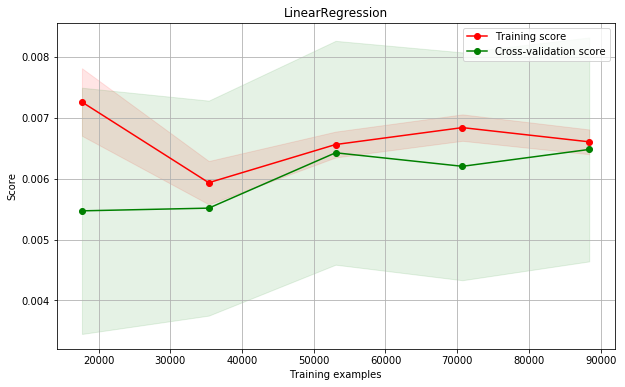

In [73]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = LinearRegression()

plot_learning_curve(estimator, "LinearRegression", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# 分群結果MSE

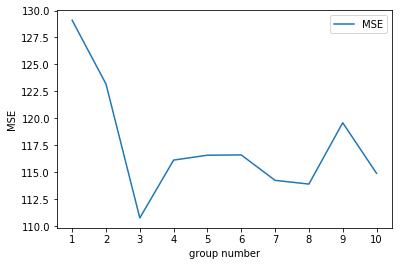

In [104]:
plt.plot(range(1,11),mse_list, label="MSE")
plt.xticks(np.linspace(1, 10, 10))
plt.xlabel('group number')
plt.ylabel('MSE')
plt.legend(loc='upper right')

# RNN部分  (輸入:t時間Ubike借用量輸出:t+1時間Ubike借用量)
# 以下單純練習用 

In [78]:
# RNN
# 臺大資訊大樓1月(幾乎無雨)
monthOf2015 = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ntu = []
for i in range(0, 1): 
    month = str(i+1).zfill(2)
    for j in range(1, monthOf2015[i]+1): 
        day = str(j).zfill(2)
        print(month + day)
        try:
            fr = open('day/' + month + day + '.csv', 'r', encoding='utf8')
        except:
            print('Not Found')
            continue
        temp = []
        while True:
            line = fr.readline().strip()
            if line == '':
                break
            lineList = line.split(',')
            if lineList[0] == '臺大資訊大樓':
                for k in range(0, 24):
                    ntu.append(int(lineList[k+1]))
                break
        fr.close()
print(len(ntu))

0101
0102
0103
0104
0105
0106
0107
0108
0109
0110
0111
0112
0113
0114
0115
0116
0117
0118
0119
0120
0121
0122
0123
0124
0125
0126
0127
0128
0129
0130
0131
744


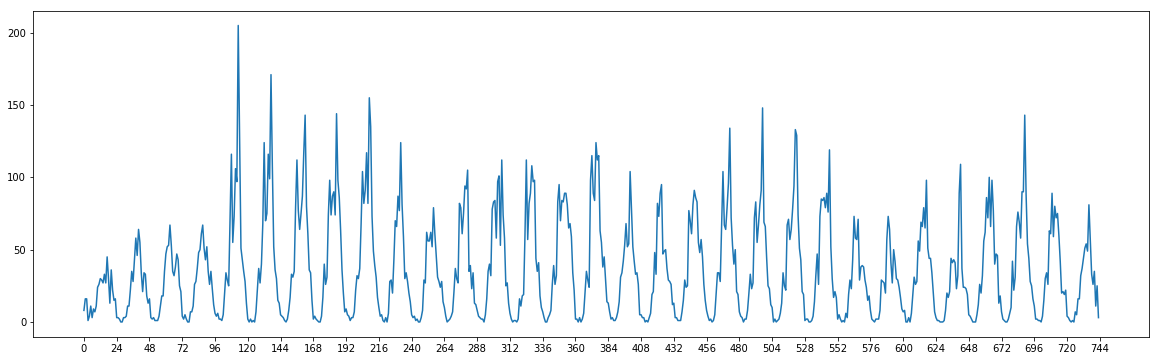

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.plot(ntu)

In [80]:
df_rnn = pd.DataFrame(columns=['X','Y'])

In [81]:
for i in range(len(ntu)-1):
    df_rnn.loc[i,'X'] = ntu[i]
    df_rnn.loc[i,'Y'] = ntu[i+1]

In [82]:
X_rnn = np.array(df_rnn.X).reshape(len(df_rnn), 1, 1)
y_rnn = np.array(df_rnn.Y).reshape(len(df_rnn), 1)
print(X_rnn.shape)
print(y_rnn.shape)

(743, 1, 1)
(743, 1)


In [83]:
# 使用SimpleRNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM

In [84]:
# RNN/LSTM: input format (batch_size, timesteps, input_dim)
model = Sequential()
model.add(SimpleRNN(units=20, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.fit(X_rnn, y_rnn, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
743/743 [==============================] - 1s 908us/step - loss: 2609.4001
Epoch 2/100
743/743 [==============================] - 0s 274us/step - loss: 2295.6349
Epoch 3/100
743/743 [==============================] - 0s 265us/step - loss: 2079.9217
Epoch 4/100
743/743 [==============================] - 0s 266us/step - loss: 1912.5663
Epoch 5/100
743/743 [==============================] - 0s 261us/step - loss: 1772.8055
Epoch 6/100
743/743 [==============================] - 0s 267us/step - loss: 1649.3511
Epoch 7/100
743/743 [==============================] - 0s 265us/step - loss: 1536.0627
Epoch 8/100
743/743 [==============================] - 0s 256us/step - loss: 1433.5880
Epoch 9/100
743/743 [==============================] - 0s 275us/step - loss: 1341.0090
Epoch 10/100
743/743 [==============================] - 0s 263us/step - loss: 1256.9979
Epoch 11/100
743/743 [==============================] - 0s 264us/step - loss: 1180.7764
Epoch 12/100
743/743 [===================

Epoch 95/100
743/743 [==============================] - 0s 261us/step - loss: 326.4220
Epoch 96/100
743/743 [==============================] - 0s 265us/step - loss: 324.1572
Epoch 97/100
743/743 [==============================] - 0s 269us/step - loss: 324.1095
Epoch 98/100
743/743 [==============================] - 0s 259us/step - loss: 321.7459
Epoch 99/100
743/743 [==============================] - 0s 267us/step - loss: 322.1487
Epoch 100/100
743/743 [==============================] - 0s 257us/step - loss: 324.7220


In [10]:
y_pred_rnn = model.predict(X_rnn).reshape(-1)
y_pred_rnn.shape

(743,)

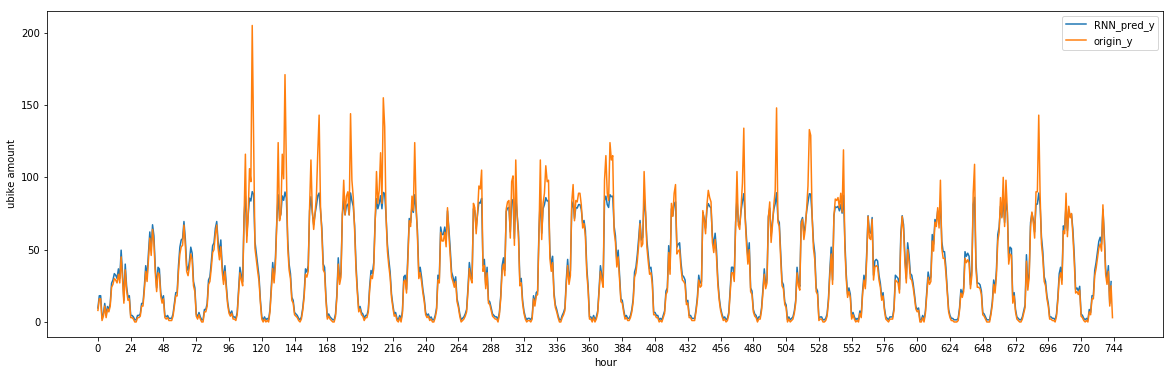

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.xlabel('hour')
plt.ylabel('ubike amount')
plt.plot(y_pred_rnn, label='RNN_pred_y')
plt.plot(ntu, label='origin_y')
plt.legend()

In [74]:
# RNN/LSTM
model = Sequential()
model.add(LSTM(units=20, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.fit(X_rnn, y_rnn, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
743/743 [==============================] - 1s 2ms/step - loss: 2408.0428
Epoch 2/100
743/743 [==============================] - 0s 426us/step - loss: 2136.3775
Epoch 3/100
743/743 [==============================] - 0s 424us/step - loss: 1926.3682
Epoch 4/100
743/743 [==============================] - 0s 430us/step - loss: 1776.9536
Epoch 5/100
743/743 [==============================] - 0s 434us/step - loss: 1647.2007
Epoch 6/100
743/743 [==============================] - 0s 423us/step - loss: 1538.4285
Epoch 7/100
743/743 [==============================] - 0s 421us/step - loss: 1443.2448
Epoch 8/100
743/743 [==============================] - 0s 426us/step - loss: 1361.4423
Epoch 9/100
743/743 [==============================] - 0s 412us/step - loss: 1287.7814
Epoch 10/100
743/743 [==============================] - 0s 441us/step - loss: 1221.2307
Epoch 11/100
743/743 [==============================] - 0s 431us/step - loss: 1159.9657
Epoch 12/100
743/743 [=====================

743/743 [==============================] - 0s 428us/step - loss: 323.8746
Epoch 96/100
743/743 [==============================] - 0s 413us/step - loss: 321.6656
Epoch 97/100
743/743 [==============================] - 0s 428us/step - loss: 322.8101
Epoch 98/100
743/743 [==============================] - 0s 422us/step - loss: 320.7173
Epoch 99/100
743/743 [==============================] - 0s 402us/step - loss: 316.0610
Epoch 100/100
743/743 [==============================] - 0s 409us/step - loss: 322.3560


In [87]:
y_pred_lstm = model.predict(X_rnn).reshape(-1)

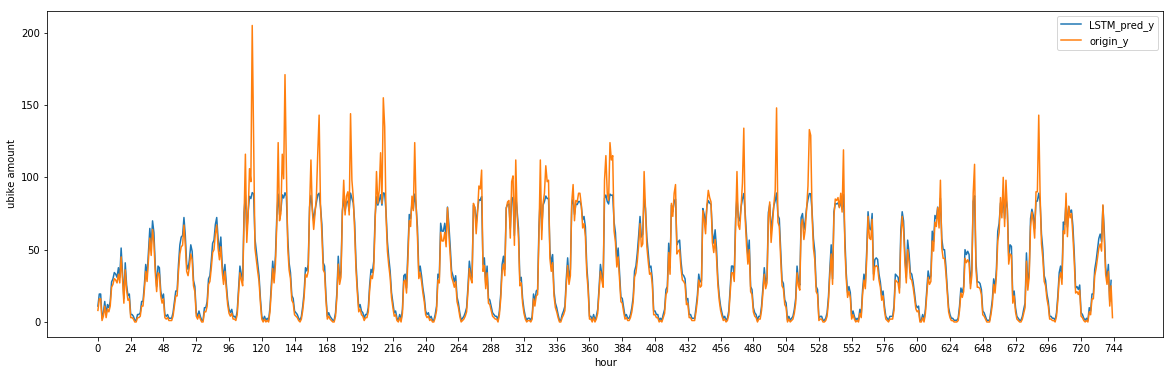

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.xlabel('hour')
plt.ylabel('ubike amount')
plt.plot(y_pred_lstm, label='LSTM_pred_y')
plt.plot(ntu, label='origin_y')
plt.legend()

In [17]:
# DNN
model = Sequential()
model.add(Dense(20, input_dim=1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [19]:
X_mlp = df_rnn[['X']]
y_mlp = df_rnn[['Y']]

In [20]:
history = model.fit(X_mlp.values, y_mlp.values, epochs=100, batch_size=5)

Epoch 1/100
743/743 [==============================] - 0s 640us/step - loss: 1189.9329
Epoch 2/100
743/743 [==============================] - 0s 221us/step - loss: 379.2647
Epoch 3/100
743/743 [==============================] - 0s 195us/step - loss: 378.2440
Epoch 4/100
743/743 [==============================] - 0s 209us/step - loss: 374.7487
Epoch 5/100
743/743 [==============================] - 0s 206us/step - loss: 374.6413
Epoch 6/100
743/743 [==============================] - 0s 213us/step - loss: 374.4223
Epoch 7/100
743/743 [==============================] - 0s 215us/step - loss: 374.5418
Epoch 8/100
743/743 [==============================] - 0s 205us/step - loss: 376.3668
Epoch 9/100
743/743 [==============================] - 0s 203us/step - loss: 373.4519
Epoch 10/100
743/743 [==============================] - 0s 207us/step - loss: 371.2130
Epoch 11/100
743/743 [==============================] - 0s 220us/step - loss: 368.3019
Epoch 12/100
743/743 [=============================

In [77]:
y_pred_mlp = model.predict(X_mlp.values).reshape(-1)

NameError: name 'X_mlp' is not defined

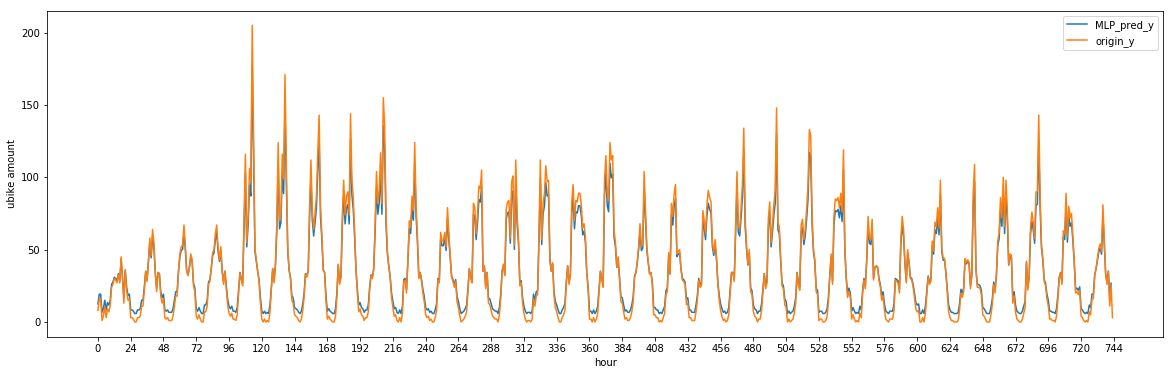

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.xlabel('hour')
plt.ylabel('ubike amount')
plt.plot(y_pred_mlp, label='MLP_pred_y')
plt.plot(ntu, label='origin_y')
plt.legend()

In [25]:
# simple RNN 用前20天訓練，後11天測試
df_rnn = pd.DataFrame(columns=['X','Y'])

for i in range(0,480-1):
    df_rnn.loc[i,'X'] = ntu[i]
    df_rnn.loc[i,'Y'] = ntu[i+1]
    
X_rnn = np.array(df_rnn.X).reshape(len(df_rnn), 1, 1)
y_rnn = np.array(df_rnn.Y).reshape(len(df_rnn), 1)
print(X_rnn.shape)
print(y_rnn.shape)


from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM

# RNN/LSTM: input format (batch_size, timesteps, input_dim)
model = Sequential()
model.add(SimpleRNN(units=20, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

print(model.summary())
model.fit(X_rnn, y_rnn, epochs=100, batch_size=5, verbose=1)

df_rnn_test = pd.DataFrame(columns=['X','Y'])
for i in range(480,len(ntu)-1):
    df_rnn_test.loc[i,'X'] = ntu[i]
    df_rnn_test.loc[i,'Y'] = ntu[i+1]
X_rnn_test = np.array(df_rnn_test.X).reshape(len(df_rnn_test), 1, 1)
y_rnn_test = np.array(df_rnn_test.Y).reshape(len(df_rnn_test), 1)
print(X_rnn_test.shape)
print(y_rnn_test.shape)

y_pred_rnn = model.predict(X_rnn_test).reshape(-1)
print(y_pred_rnn.shape)

(479, 1, 1)
(479, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
479/479 [==============================] - 1s 1ms/step - loss: 2540.4598
Epoch 2/100
479/479 [==============================] - 0s 259us/step - loss: 2376.6437
Epoch 3/100
479/479 [==============================] - 0s 267us/step - loss: 2246.4166
Epoch 4/100
479/479 [==============================] - 0s 283us/step - loss: 2119.0644
Epoch 5/100
479/479 [==============================] - 0s 294us/step - loss: 2020.5968
Epoch 6/100
479/479 [==============================] - 0s 302us/step - loss: 1927

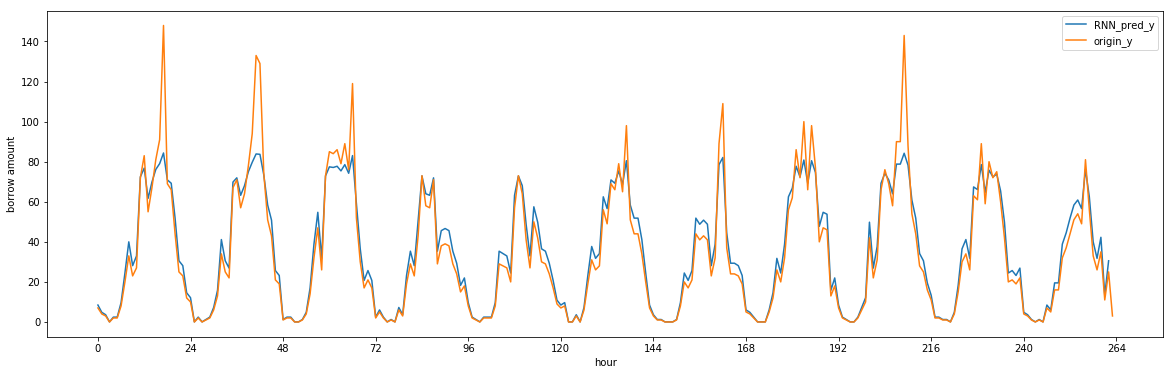

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.xlabel('hour')
plt.ylabel('borrow amount')
plt.plot(y_pred_rnn, label='RNN_pred_y')
plt.plot(ntu[480:], label='origin_y')
plt.legend()

In [28]:
# LSTM 用前20天訓練，後11天測試
df_lstm = pd.DataFrame(columns=['X','Y'])
for i in range(0,480-1):
    df_lstm.loc[i,'X'] = ntu[i]
    df_lstm.loc[i,'Y'] = ntu[i+1]
    
X_lstm = np.array(df_lstm.X).reshape(len(df_lstm), 1, 1)
y_lstm = np.array(df_lstm.Y).reshape(len(df_lstm), 1)
print(X_lstm.shape)
print(y_lstm.shape)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM

# RNN/LSTM
model = Sequential()
model.add(LSTM(units=20, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

print(model.summary())
model.fit(X_lstm, y_lstm, epochs=100, batch_size=5, verbose=1)

df_lstm_test = pd.DataFrame(columns=['X','Y'])
for i in range(480,len(ntu)-1):
    df_lstm_test.loc[i,'X'] = ntu[i]
    df_lstm_test.loc[i,'Y'] = ntu[i+1]
X_lstm_test = np.array(df_lstm_test.X).reshape(len(df_lstm_test), 1, 1)
y_lstm_test = np.array(df_lstm_test.Y).reshape(len(df_lstm_test), 1)
print(X_lstm_test.shape)
print(y_lstm_test.shape)
y_pred_lstm = model.predict(X_lstm_test).reshape(-1)
print(y_pred_lstm.shape)

(479, 1, 1)
(479, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
479/479 [==============================] - 1s 3ms/step - loss: 2593.4152
Epoch 2/100
479/479 [==============================] - 0s 465us/step - loss: 2482.3713
Epoch 3/100
479/479 [==============================] - 0s 491us/step - loss: 2253.6042
Epoch 4/100
479/479 [==============================] - 0s 467us/step - loss: 2064.4841
Epoch 5/100
479/479 [==============================] - 0s 456us/step - loss: 1964.5398
Epoch 6/100
479/479 [==============================] - 0s 460us/step - loss: 

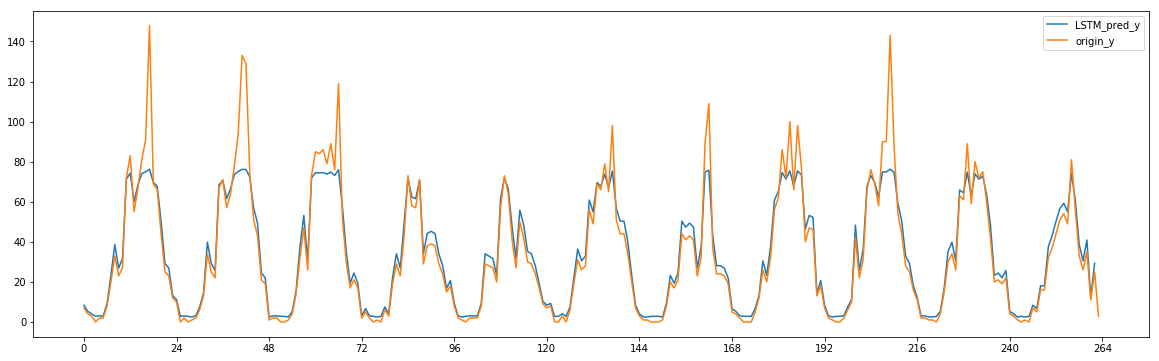

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.xlabel('hour')
plt.ylabel('borrow amount')
plt.plot(y_pred_lstm, label='LSTM_pred_y')
plt.plot(ntu[480:], label='origin_y')
plt.legend()

In [30]:
# DNN 用前20天訓練，後11天測試
df_dnn = pd.DataFrame(columns=['X','Y'])
for i in range(0,480-1):
    df_dnn.loc[i,'X'] = ntu[i]
    df_dnn.loc[i,'Y'] = ntu[i+1]
    
X_dnn = np.array(df_dnn.X).reshape(len(df_dnn), 1, 1)
y_dnn = np.array(df_dnn.Y).reshape(len(df_dnn), 1)
print(X_dnn.shape)
print(y_dnn.shape)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM

# DNN
model = Sequential()
model.add(Dense(20, input_dim=1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

print(model.summary())
X_mlp = df_dnn[['X']]
y_mlp = df_dnn[['Y']]

history = model.fit(X_mlp.values, y_mlp.values, epochs=100, batch_size=5)

df_dnn_test = pd.DataFrame(columns=['X','Y'])
for i in range(480,len(ntu)-1):
    df_dnn_test.loc[i,'X'] = ntu[i]
    df_dnn_test.loc[i,'Y'] = ntu[i+1]
X_dnn_test = np.array(df_dnn_test.X).reshape(len(df_dnn_test), 1, 1)
y_dnn_test = np.array(df_dnn_test.Y).reshape(len(df_dnn_test), 1)
print(X_dnn_test.shape)
print(y_dnn_test.shape)

X_mlp_test = df_dnn_test[['X']]
y_mlp_test = df_dnn_test[['Y']]

y_pred_mlp = model.predict(X_mlp_test.values).reshape(-1)
print(y_pred_mlp.shape)

(479, 1, 1)
(479, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
479/479 [==============================] - 1s 1ms/step - loss: 1481.8225
Epoch 2/100
479/479 [==============================] - 0s 270us/step - loss: 476.0377
Epoch 3/100
479/479 [==============================] - 0s 282us/step - loss: 406.6398
Epoch 4/100
479/479 [==============================] - 0s 237us/step - loss: 406.4887
Epoch 5/100
479/479 [==============================] - 0s 250us/step - loss: 405.3565
Epoch 6/100
479/479 [==============================] - 0s 238us/step - loss: 406.7868
E

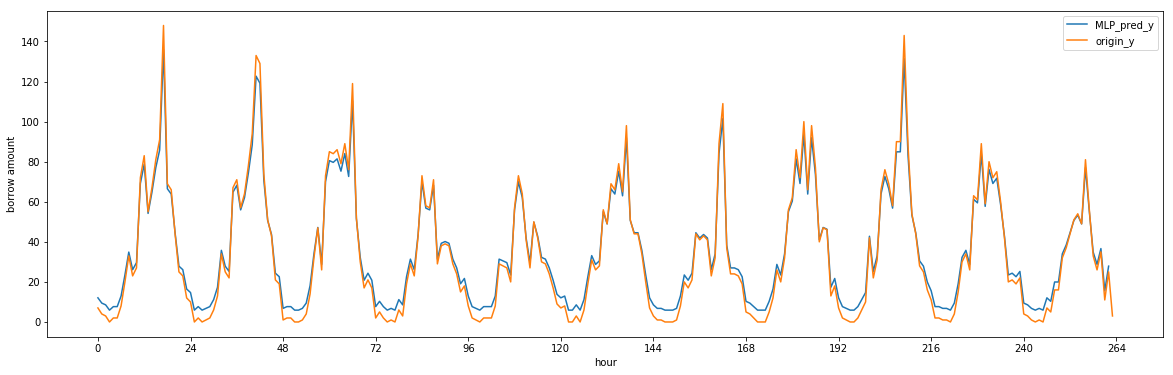

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.xlabel('hour')
plt.ylabel('borrow amount')
plt.plot(y_pred_mlp, label='MLP_pred_y')
plt.plot(ntu[480:], label='origin_y')
plt.legend()

In [1]:
# RNN test 臺大資訊大樓8月(有雨)
monthOf2015 = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ntu = []
for i in range(7, 8): 
    month = str(i+1).zfill(2)
    for j in range(1, monthOf2015[i]+1): 
        day = str(j).zfill(2)
        print(month + day)
        try:
            fr = open('day/' + month + day + '.csv', 'r', encoding='utf8')
        except:
            print('Not Found')
            continue
        temp = []
        while True:
            line = fr.readline().strip()
            if line == '':
                break
            lineList = line.split(',')
            if lineList[0] == '臺大資訊大樓':
                for k in range(0, 24):
                    ntu.append(int(lineList[k+1]))
                break
        fr.close()
print(len(ntu))

0801
0802
0803
0804
0805
0806
0807
0808
0809
0810
0811
0812
0813
0814
0815
0816
0817
0818
0819
0820
0821
0822
0823
0824
0825
0826
0827
0828
0829
0830
0831
744


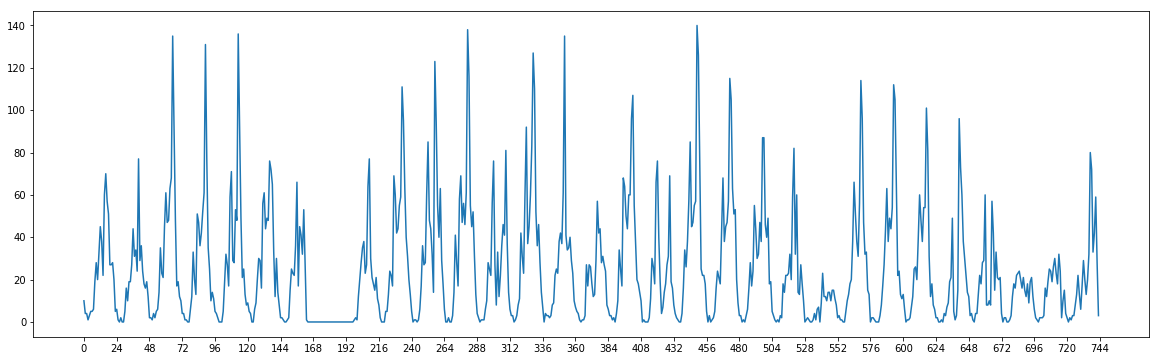

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.plot(ntu)

In [3]:
df_rnn = pd.DataFrame(columns=['X','Y'])

In [5]:
for i in range(len(ntu)-1):
    df_rnn.loc[i,'X'] = ntu[i]
    df_rnn.loc[i,'Y'] = ntu[i+1]

In [36]:
df_rnn

,X,Y
0,10,4
1,4,4
2,4,1
3,1,3
4,3,5
5,5,5
6,5,6
7,6,19
8,19,28
9,28,20


In [37]:
X_rnn = np.array(df_rnn.X).reshape(len(df_rnn), 1, 1)
y_rnn = np.array(df_rnn.Y).reshape(len(df_rnn), 1)
print(X_rnn.shape)
print(y_rnn.shape)

(743, 1, 1)
(743, 1)


In [38]:
# RNN/LSTM: input format (batch_size, timesteps, input_dim)
model = Sequential()
model.add(SimpleRNN(units=20, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_rnn, y_rnn, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
743/743 [==============================] - 1s 1ms/step - loss: 1212.0976
Epoch 2/100
743/743 [==============================] - 0s 303us/step - loss: 1083.0695
Epoch 3/100
743/743 [==============================] - 0s 300us/step - loss: 985.7598
Epoch 4/100
743/743 [==============================] - 0s 300us/step - loss: 903.4089
Epoch 5/100
743/743 [==============================] - 0s 306us/step - loss: 832.8843
Epoch 6/100
743/743 [==============================] - 0s 304us/step - loss: 771.8445
Epoch 7/100
743/743 [==============================] - 0s 304us/step - loss: 719.1086
Epoch 8/100
743/743 [==============================] - 0s 300us/step - loss: 673.7454
Epoch 9/100
743/743 [==============================] - 0s 284us/step - loss: 634.4166
Epoch 10/100
743/743 [==============================] - 0s 304us/step - loss: 599.9976
Epoch 11/100
743/743 [==============================] - 0s 255us/step - loss: 570.1774
Epoch 12/100
743/743 [==============================

In [41]:
y_pred_rnn = model.predict(X_rnn).reshape(-1)

In [42]:
y_pred_rnn.shape

(743,)

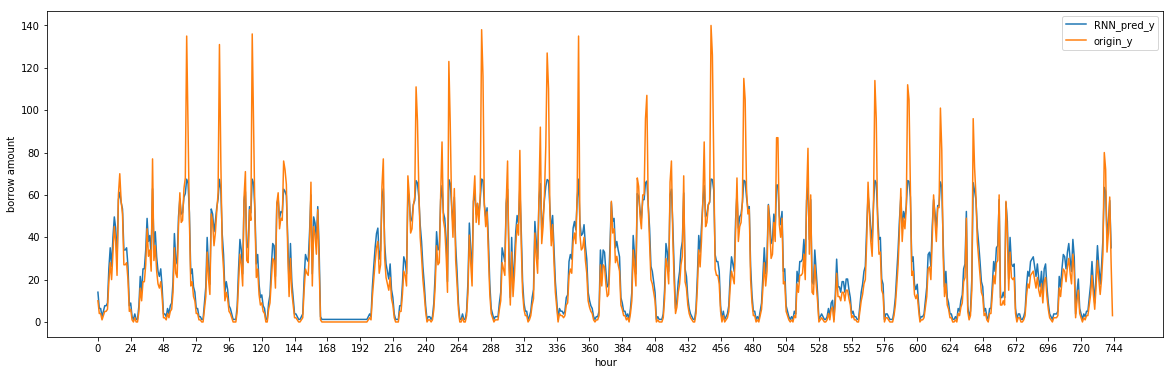

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.xlabel('hour')
plt.ylabel('borrow amount')
plt.plot(y_pred_rnn, label='RNN_pred_y')
plt.plot(ntu, label='origin_y')
plt.legend()

In [44]:
# RNN/LSTM
model = Sequential()
model.add(LSTM(units=20, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_rnn, y_rnn, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
743/743 [==============================] - 1s 2ms/step - loss: 1289.1297
Epoch 2/100
743/743 [==============================] - 0s 502us/step - loss: 1104.3824
Epoch 3/100
743/743 [==============================] - 0s 442us/step - loss: 975.6769
Epoch 4/100
743/743 [==============================] - 0s 434us/step - loss: 881.0480
Epoch 5/100
743/743 [==============================] - 0s 486us/step - loss: 821.3431
Epoch 6/100
743/743 [==============================] - 0s 457us/step - loss: 771.9042
Epoch 7/100
743/743 [==============================] - 0s 465us/step - loss: 729.2300
Epoch 8/100
743/743 [==============================] - 0s 436us/step - loss: 691.7811
Epoch 9/100
743/743 [==============================] - 0s 439us/step - loss: 658.2703
Epoch 10/100
743/743 [==============================] - 0s 447us/step - loss: 628.7930
Epoch 11/100
743/743 [==============================] - 0s 470us/step - loss: 602.8909
Epoch 12/100
743/743 [==============================

In [47]:
y_pred_lstm = model.predict(X_rnn).reshape(-1)

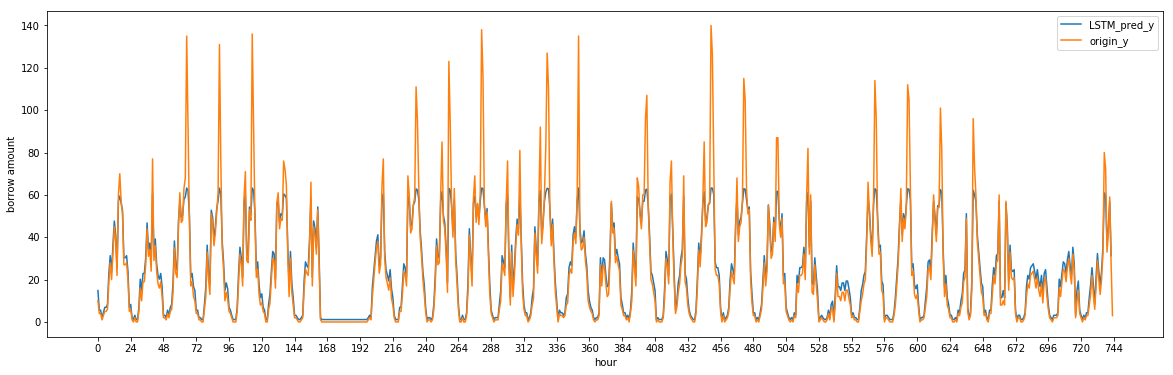

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.xlabel('hour')
plt.ylabel('borrow amount')
plt.plot(y_pred_lstm, label='LSTM_pred_y')
plt.plot(ntu, label='origin_y')
plt.legend()

In [49]:
# DNN
model = Sequential()
model.add(Dense(20, input_dim=1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [51]:
X_mlp = df_rnn[['X']]
y_mlp = df_rnn[['Y']]

In [52]:
history = model.fit(X_mlp.values, y_mlp.values, epochs=100, batch_size=5)

Epoch 1/100
743/743 [==============================] - 1s 942us/step - loss: 690.0963
Epoch 2/100
743/743 [==============================] - 0s 242us/step - loss: 332.9079
Epoch 3/100
743/743 [==============================] - 0s 227us/step - loss: 331.5301
Epoch 4/100
743/743 [==============================] - 0s 213us/step - loss: 329.9241
Epoch 5/100
743/743 [==============================] - 0s 228us/step - loss: 329.4188
Epoch 6/100
743/743 [==============================] - 0s 232us/step - loss: 327.8737
Epoch 7/100
743/743 [==============================] - 0s 232us/step - loss: 326.3287
Epoch 8/100
743/743 [==============================] - 0s 230us/step - loss: 329.1216
Epoch 9/100
743/743 [==============================] - 0s 229us/step - loss: 326.3302
Epoch 10/100
743/743 [==============================] - 0s 225us/step - loss: 324.3138
Epoch 11/100
743/743 [==============================] - 0s 234us/step - loss: 323.1846
Epoch 12/100
743/743 [==============================

In [53]:
y_pred_mlp = model.predict(X_mlp.values).reshape(-1)

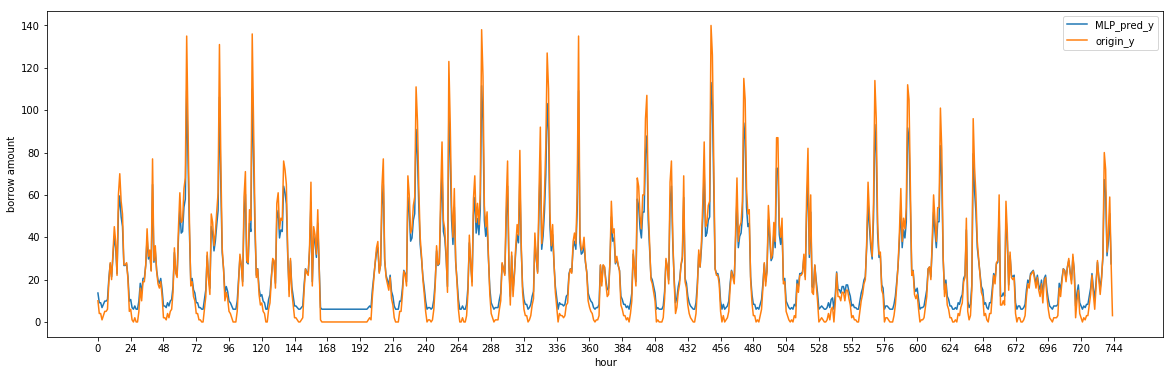

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.xlabel('hour')
plt.ylabel('borrow amount')
plt.plot(y_pred_mlp, label='MLP_pred_y')
plt.plot(ntu, label='origin_y')
plt.legend()

In [55]:
# SimpleRNN 用前20天訓練，後11天測試
df_rnn = pd.DataFrame(columns=['X','Y'])
for i in range(0,480-1):
    df_rnn.loc[i,'X'] = ntu[i]
    df_rnn.loc[i,'Y'] = ntu[i+1]
    
X_rnn = np.array(df_rnn.X).reshape(len(df_rnn), 1, 1)
y_rnn = np.array(df_rnn.Y).reshape(len(df_rnn), 1)
print(X_rnn.shape)
print(y_rnn.shape)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM

# RNN/LSTM: input format (batch_size, timesteps, input_dim)
model = Sequential()
model.add(SimpleRNN(units=20, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

print(model.summary())
model.fit(X_rnn, y_rnn, epochs=100, batch_size=5, verbose=1)

df_rnn_test = pd.DataFrame(columns=['X','Y'])
for i in range(480,len(ntu)-1):
    df_rnn_test.loc[i,'X'] = ntu[i]
    df_rnn_test.loc[i,'Y'] = ntu[i+1]
X_rnn_test = np.array(df_rnn_test.X).reshape(len(df_rnn_test), 1, 1)
y_rnn_test = np.array(df_rnn_test.Y).reshape(len(df_rnn_test), 1)
print(X_rnn_test.shape)
print(y_rnn_test.shape)
y_pred_rnn = model.predict(X_rnn_test).reshape(-1)
print(y_pred_rnn.shape)

(479, 1, 1)
(479, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
479/479 [==============================] - 1s 2ms/step - loss: 1451.0425
Epoch 2/100
479/479 [==============================] - 0s 295us/step - loss: 1323.5023
Epoch 3/100
479/479 [==============================] - 0s 277us/step - loss: 1225.1118
Epoch 4/100
479/479 [==============================] - 0s 290us/step - loss: 1156.1742
Epoch 5/100
479/479 [==============================] - 0s 300us/step - loss: 1093.2562
Epoch 6/100
479/479 [==============================] - 0s 285us/step - loss: 1035

479/479 [==============================] - 0s 308us/step - loss: 354.7881
Epoch 89/100
479/479 [==============================] - 0s 312us/step - loss: 358.7202
Epoch 90/100
479/479 [==============================] - 0s 287us/step - loss: 350.2205
Epoch 91/100
479/479 [==============================] - 0s 327us/step - loss: 355.2674
Epoch 92/100
479/479 [==============================] - 0s 331us/step - loss: 350.3571
Epoch 93/100
479/479 [==============================] - 0s 344us/step - loss: 345.6125
Epoch 94/100
479/479 [==============================] - 0s 312us/step - loss: 351.1674
Epoch 95/100
479/479 [==============================] - 0s 290us/step - loss: 348.3812
Epoch 96/100
479/479 [==============================] - 0s 326us/step - loss: 351.2855
Epoch 97/100
479/479 [==============================] - 0s 291us/step - loss: 354.6344
Epoch 98/100
479/479 [==============================] - 0s 343us/step - loss: 350.7623
Epoch 99/100
479/479 [==============================] - 

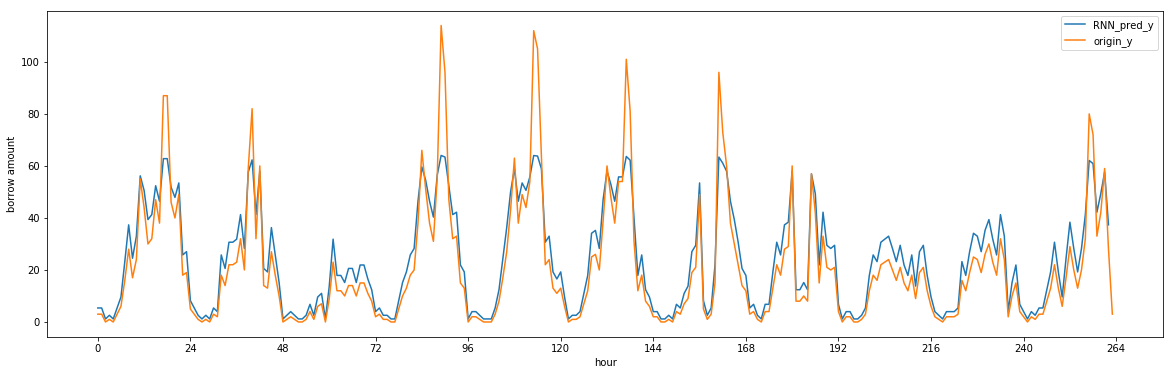

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.xlabel('hour')
plt.ylabel('borrow amount')
plt.plot(y_pred_rnn, label='RNN_pred_y')
plt.plot(ntu[480:], label='origin_y')
plt.legend()

In [57]:
# LSTM 用前20天訓練，後11天測試
df_lstm = pd.DataFrame(columns=['X','Y'])
for i in range(0,480-1):
    df_lstm.loc[i,'X'] = ntu[i]
    df_lstm.loc[i,'Y'] = ntu[i+1]
    
X_lstm = np.array(df_lstm.X).reshape(len(df_lstm), 1, 1)
y_lstm = np.array(df_lstm.Y).reshape(len(df_lstm), 1)
print(X_lstm.shape)
print(y_lstm.shape)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM

# RNN/LSTM
model = Sequential()
model.add(LSTM(units=20, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

print(model.summary())
model.fit(X_lstm, y_lstm, epochs=100, batch_size=5, verbose=1)

df_lstm_test = pd.DataFrame(columns=['X','Y'])
for i in range(480,len(ntu)-1):
    df_lstm_test.loc[i,'X'] = ntu[i]
    df_lstm_test.loc[i,'Y'] = ntu[i+1]
X_lstm_test = np.array(df_lstm_test.X).reshape(len(df_lstm_test), 1, 1)
y_lstm_test = np.array(df_lstm_test.Y).reshape(len(df_lstm_test), 1)
print(X_lstm_test.shape)
print(y_lstm_test.shape)
y_pred_lstm = model.predict(X_lstm_test).reshape(-1)
print(y_pred_lstm.shape)

(479, 1, 1)
(479, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
479/479 [==============================] - 2s 3ms/step - loss: 1513.8425
Epoch 2/100
479/479 [==============================] - 0s 485us/step - loss: 1411.7051
Epoch 3/100
479/479 [==============================] - 0s 469us/step - loss: 1308.3881
Epoch 4/100
479/479 [==============================] - 0s 417us/step - loss: 1239.5114
Epoch 5/100
479/479 [==============================] - 0s 478us/step - loss: 1171.6692
Epoch 6/100
479/479 [==============================] - 0s 425us/step - loss: 

479/479 [==============================] - 0s 425us/step - loss: 364.1871
Epoch 89/100
479/479 [==============================] - 0s 428us/step - loss: 363.9522
Epoch 90/100
479/479 [==============================] - 0s 463us/step - loss: 363.7673
Epoch 91/100
479/479 [==============================] - 0s 464us/step - loss: 363.8796
Epoch 92/100
479/479 [==============================] - 0s 497us/step - loss: 362.6715
Epoch 93/100
479/479 [==============================] - 0s 462us/step - loss: 361.4772
Epoch 94/100
479/479 [==============================] - 0s 418us/step - loss: 355.7641
Epoch 95/100
479/479 [==============================] - 0s 453us/step - loss: 360.8052
Epoch 96/100
479/479 [==============================] - 0s 462us/step - loss: 357.8919
Epoch 97/100
479/479 [==============================] - 0s 476us/step - loss: 354.1611
Epoch 98/100
479/479 [==============================] - 0s 481us/step - loss: 354.5288
Epoch 99/100
479/479 [==============================] - 

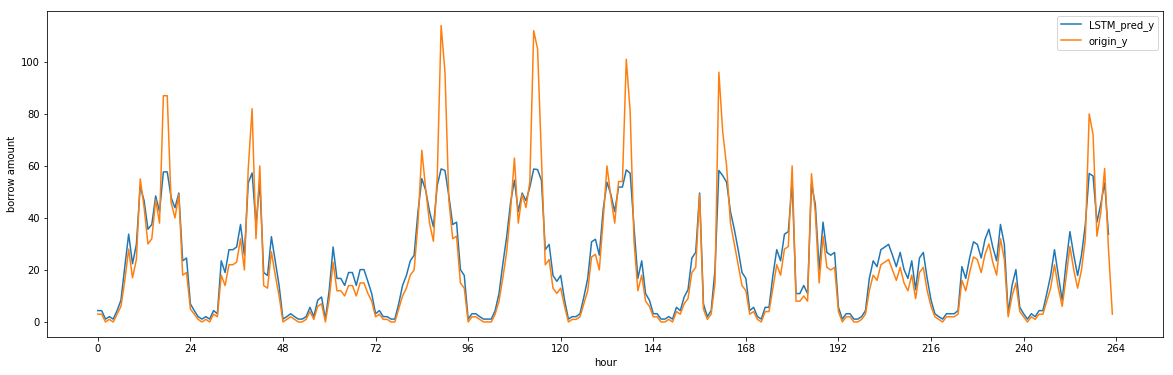

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.xlabel('hour')
plt.ylabel('borrow amount')
plt.plot(y_pred_lstm, label='LSTM_pred_y')
plt.plot(ntu[480:], label='origin_y')
plt.legend()

In [59]:
# DNN 用前20天訓練，後11天測試
df_dnn = pd.DataFrame(columns=['X','Y'])
for i in range(0,480-1):
    df_dnn.loc[i,'X'] = ntu[i]
    df_dnn.loc[i,'Y'] = ntu[i+1]
    
X_dnn = np.array(df_dnn.X).reshape(len(df_dnn), 1, 1)
y_dnn = np.array(df_dnn.Y).reshape(len(df_dnn), 1)
print(X_dnn.shape)
print(y_dnn.shape)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM

# DNN
model = Sequential()
model.add(Dense(20, input_dim=1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

print(model.summary())
X_mlp = df_dnn[['X']]
y_mlp = df_dnn[['Y']]

history = model.fit(X_mlp.values, y_mlp.values, epochs=100, batch_size=5)

df_dnn_test = pd.DataFrame(columns=['X','Y'])
for i in range(480,len(ntu)-1):
    df_dnn_test.loc[i,'X'] = ntu[i]
    df_dnn_test.loc[i,'Y'] = ntu[i+1]
X_dnn_test = np.array(df_dnn_test.X).reshape(len(df_dnn_test), 1, 1)
y_dnn_test = np.array(df_dnn_test.Y).reshape(len(df_dnn_test), 1)
print(X_dnn_test.shape)
print(y_dnn_test.shape)

X_mlp_test = df_dnn_test[['X']]
y_mlp_test = df_dnn_test[['Y']]

y_pred_mlp = model.predict(X_mlp_test.values).reshape(-1)
print(y_pred_mlp.shape)

(479, 1, 1)
(479, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 21        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
479/479 [==============================] - 1s 2ms/step - loss: 749.2082
Epoch 2/100
479/479 [==============================] - 0s 254us/step - loss: 397.1898
Epoch 3/100
479/479 [==============================] - 0s 251us/step - loss: 387.2828
Epoch 4/100
479/479 [==============================] - 0s 255us/step - loss: 381.0827
Epoch 5/100
479/479 [==============================] - 0s 220us/step - loss: 381.6642
Epoch 6/100
479/479 [==============================] - 0s 229us/step - loss: 379.4887
Ep

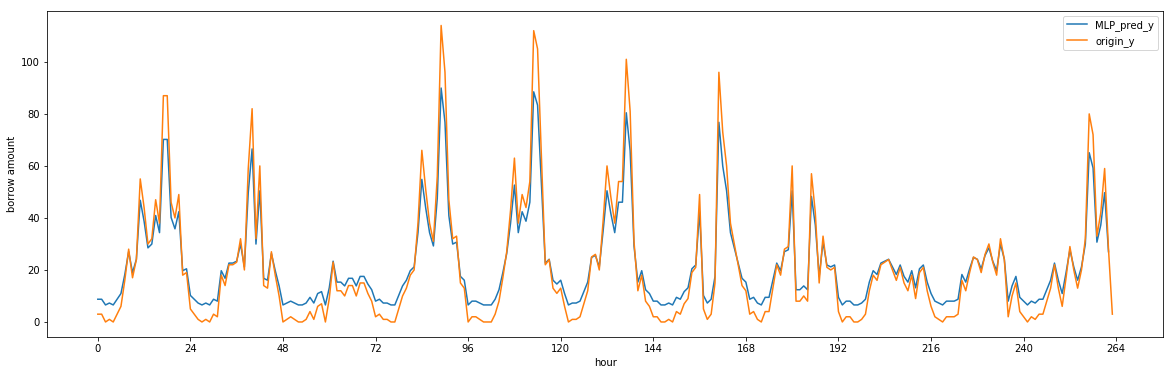

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.xlabel('hour')
plt.ylabel('borrow amount')
plt.plot(y_pred_mlp, label='MLP_pred_y')
plt.plot(ntu[480:], label='origin_y')
plt.legend()

In [ ]:
# RNN 輸入雨量+車流 
# RNN test 臺大資訊大樓8月(有雨)
monthOf2015 = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ntu = []
rain = []
for i in range(7, 8): 
    month = str(i+1).zfill(2)
    for j in range(1, monthOf2015[i]+1): 
        day = str(j).zfill(2)
        print(month + day)
        try:
            fr = open('day/' + month + day + '.csv', 'r', encoding='utf8')
        except:
            print('Not Found')
            continue
        temp = []
        while True:
            line = fr.readline().strip()
            if line == '':
                break
            lineList = line.split(',')
            if lineList[0] == '臺大資訊大樓':
                for k in range(0, 24):
                    ntu.append(int(lineList[k+1]))
                break
        fr.close()
print(len(ntu))

fr = open('raindata.csv', 'r', encoding='utf8')
for i in range(7, 8): 
    month = str(i+1).zfill(2)
    for j in range(1, monthOf2015[i]+1): 
        day = str(j).zfill(2)
        print(month + day)
        temp = []
        while True:
            line = fr.readline().strip()
            if line == '':
                break
            lineList = line.split(',')
            if lineList[0] == month+day:
                for k in range(0, 24):
                    rain.append(float(lineList[k+1]))
                break
fr.close()
print(len(rain))

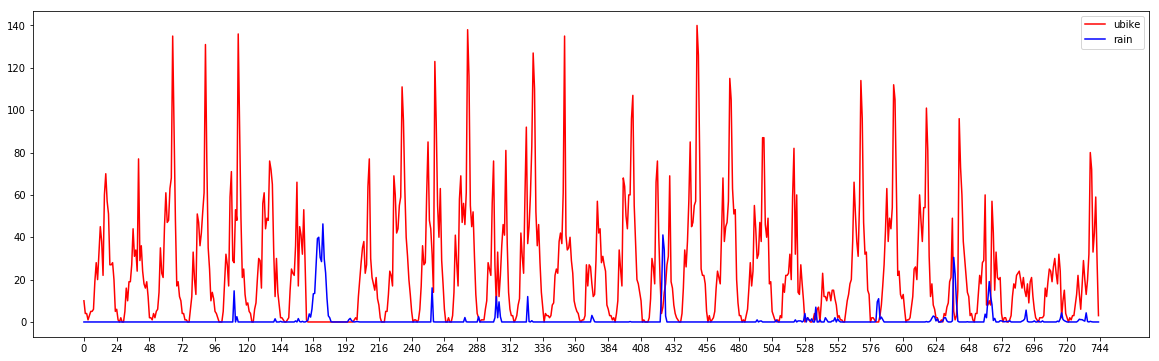

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.plot(ntu,'r',label='ubike')
plt.plot(rain,'b',label='rain')
plt.legend()

In [3]:
df_rnn = pd.DataFrame(columns=['Rain','Amount','Y'])

In [4]:
for i in range(len(ntu)-1):
    df_rnn.loc[i,'Amount'] = ntu[i]
    df_rnn.loc[i,'Rain'] = rain[i]
    df_rnn.loc[i,'Y'] = ntu[i+1]

In [5]:
df_rnn

,Rain,Amount,Y
0,0,10,4
1,0,4,4
2,0,4,1
3,0,1,3
4,0,3,5
5,0,5,5
6,0,5,6
7,0,6,19
8,0,19,28
9,0,28,20


In [52]:
np.array(df_rnn[['Rain','Amount']])

array([[0.0, 10],
       [0.0, 4],
       [0.0, 4],
       ..., 
       [0.0, 42],
       [0.0, 59],
       [0.0, 28]], dtype=object)

In [8]:
X_rnn = np.array(df_rnn[['Rain','Amount']]).reshape(len(df_rnn), 2, 1)
y_rnn = np.array(df_rnn.Y).reshape(len(df_rnn), 1)
print(X_rnn.shape)
print(y_rnn.shape)


(743, 2, 1)
(743, 1)


In [9]:
# 使用SimpleRNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM

Using TensorFlow backend.


In [14]:
# RNN/LSTM: input format (batch_size, timesteps, input_dim)
model = Sequential()
model.add(SimpleRNN(units=20, input_shape=(2,1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [15]:
model.fit(X_rnn, y_rnn, epochs=100, batch_size=5, verbose=1)

Epoch 1/100
743/743 [==============================] - 1s 764us/step - loss: 1114.1576
Epoch 2/100
743/743 [==============================] - 0s 284us/step - loss: 1007.0453
Epoch 3/100
743/743 [==============================] - 0s 271us/step - loss: 919.6888
Epoch 4/100
743/743 [==============================] - 0s 283us/step - loss: 845.0004
Epoch 5/100
743/743 [==============================] - 0s 253us/step - loss: 780.1318
Epoch 6/100
743/743 [==============================] - 0s 281us/step - loss: 724.5109
Epoch 7/100
743/743 [==============================] - 0s 267us/step - loss: 676.6026
Epoch 8/100
743/743 [==============================] - 0s 277us/step - loss: 635.7782
Epoch 9/100
743/743 [==============================] - 0s 275us/step - loss: 600.4797
Epoch 10/100
743/743 [==============================] - 0s 260us/step - loss: 568.8842
Epoch 11/100
743/743 [==============================] - 0s 279us/step - loss: 542.7361
Epoch 12/100
743/743 [============================

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 20)                440       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [16]:
y_pred_rnn = model.predict(X_rnn).reshape(-1)
y_pred_rnn.shape

(743,)

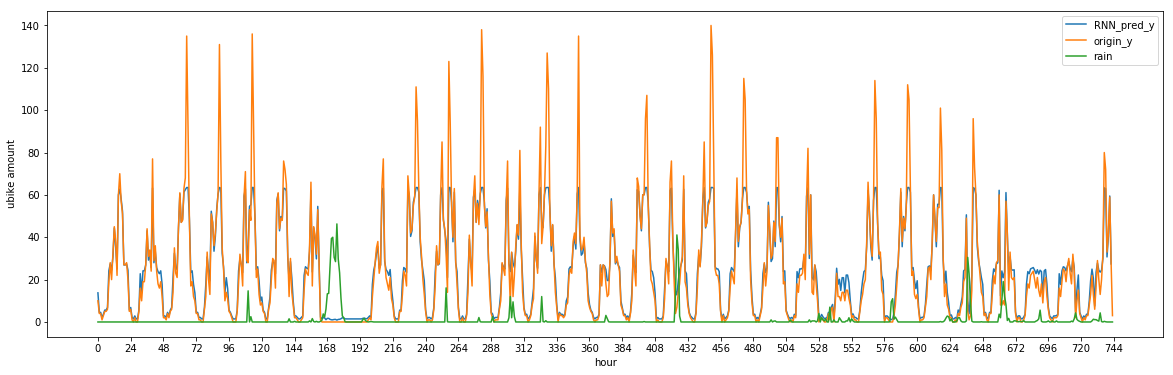

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.xticks(range(0,745,24))
plt.xlabel('hour')
plt.ylabel('ubike amount')
plt.plot(y_pred_rnn, label='RNN_pred_y')
plt.plot(ntu, label='origin_y')
plt.plot(rain, label='rain')
plt.legend()

In [23]:
y_pred_rnn

array([ 13.75031281,   4.54051399,   4.54051399,   2.12778664,
         3.64088535,   5.59190559,   5.59190559,   6.83302593,
        24.14890671,  27.4151516 ,  24.46046829,  30.70128632,
        44.4041481 ,  35.52625656,  25.05430031,  60.02115631,
        62.74897766,  58.16074753,  52.29492188,  26.92230225,
        26.92230225,  27.4151516 ,  24.46046829,   5.59190559,
         6.83302593,   2.12778664,   1.44271851,   2.84984756,
         1.44271851,   1.44271851,   5.59190559,  22.7836647 ,
        13.75031281,  24.14890671,  24.14890671,  26.92230225,
        43.04712296,  29.21047592,  31.54077339,  25.70370483,
        63.24036407,  27.95846558,  33.41025543,  25.70370483,
        23.79493713,  22.7836647 ,  24.14890671,  17.73135567,
         2.84984756,   2.84984756,   2.12778664,   4.54051399,
         2.84984756,   5.59190559,   6.83302593,  20.91043091,
        32.44390106,  25.36706161,  24.75627518,  44.4041481 ,
        60.5005455 ,  47.12714767,  48.4712944 ,  61.28

In [26]:
X_rnn

array([[[0.0],
        [10]],

       [[0.0],
        [4]],

       [[0.0],
        [4]],

       ..., 
       [[0.0],
        [42]],

       [[0.0],
        [59]],

       [[0.0],
        [28]]], dtype=object)

In [25]:
# 測試區
df_rnn = pd.DataFrame(columns=['Rain','X-2','X-1','Y'])
df_rnn
count = 1
temp = [a,b,c]
for i in temp:
    print(i)
    i = df_rnn['X'][count:]
    count+=1

NameError: name 'a' is not defined

In [14]:
# LSTM 臺大資訊大樓 (有雨)

monthOf2015 = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ntu = []
rain = []

count = 0
f1 = open('raindata.csv', 'r', encoding='utf8')
while True:
    line1 = f1.readline().strip()
    if line1 == '':
        break
    line1List = line1.split(',')
    if line1[-1] == 'T':
        for i in range(0, 24):
            rain.append(float(line1List[i+1]))
        count+=1
        f2 = open('day/' + str(line1[0:4]) + '.csv', 'r', encoding='utf8')
        while True:
            line2 = f2.readline().strip()
            if line2 == '':
                break
            line2List = line2.split(',')
            if line2List[0] == '臺大資訊大樓':
                for i in range(0, 24):
                    ntu.append(int(line2List[i+1]))
                break
        f2.close()
f1.close()
print(count)

95


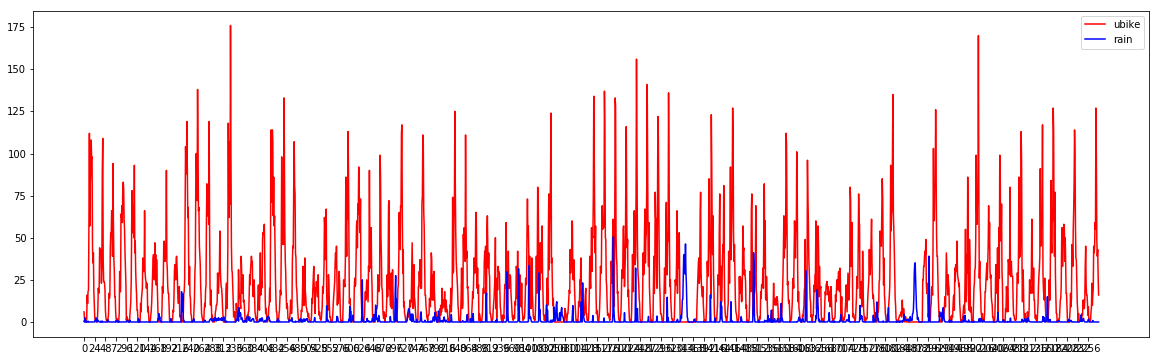

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.figure(figsize=(20,6))
plt.xticks(range(0,2280,24))
plt.plot(ntu,'r',label='ubike')
plt.plot(rain,'b',label='rain')
plt.legend()

In [35]:
df_ubike = pd.DataFrame({'ubike':ntu})
print(df_ubike.describe())

df_rain = pd.DataFrame({'rain':rain})
print(df_rain.describe())

df_ubike = df_ubike.values
df_rain = df_rain.values

             ubike
count  2280.000000
mean     23.261842
std      26.791368
min       0.000000
25%       3.000000
50%      15.000000
75%      33.000000
max     176.000000
              rain
count  2280.000000
mean      1.080570
std       4.040805
min       0.000000
25%       0.000000
50%       0.000000
75%       0.500000
max      50.500000


In [36]:
df_rnn1 = pd.DataFrame(columns=['Rain','X1','Y'])
df_rnn2 = pd.DataFrame(columns=['Rain','X1','X2','Y'])

for i in range(len(df_ubike)-1):
    df_rnn1.loc[i,'Rain'] = np.asscalar(df_rain[i])
    df_rnn1.loc[i,'X1'] = np.asscalar(df_ubike[i])
    df_rnn1.loc[i,'Y'] = np.asscalar(df_ubike[i+1])

for i in range(len(df_ubike)-2):
    df_rnn2.loc[i,'Rain'] = np.asscalar(df_rain[i+1])
    df_rnn2.loc[i,'X1'] = np.asscalar(df_ubike[i])
    df_rnn2.loc[i,'X2'] = np.asscalar(df_ubike[i+1])
    df_rnn2.loc[i,'Y'] = np.asscalar(df_ubike[i+2])
df_list = [df_rnn1,df_rnn2]

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import SimpleRNN, LSTM

Epoch 1/100
1824/1824 [==============================] - 2s 1ms/step - loss: 1128.0044
Epoch 2/100
1824/1824 [==============================] - 1s 540us/step - loss: 825.5737
Epoch 3/100
1824/1824 [==============================] - 1s 519us/step - loss: 683.2714
Epoch 4/100
1824/1824 [==============================] - 1s 539us/step - loss: 591.1715
Epoch 5/100
1824/1824 [==============================] - 1s 528us/step - loss: 524.3257
Epoch 6/100
1824/1824 [==============================] - 1s 543us/step - loss: 475.1700
Epoch 7/100
1824/1824 [==============================] - 1s 579us/step - loss: 436.7395
Epoch 8/100
1824/1824 [==============================] - 1s 567us/step - loss: 406.7873
Epoch 9/100
1824/1824 [==============================] - 1s 559us/step - loss: 382.6058
Epoch 10/100
1824/1824 [==============================] - 1s 526us/step - loss: 363.1467
Epoch 11/100
1824/1824 [==============================] - 1s 526us/step - loss: 346.5999
Epoch 12/100
1824/1824 [=======

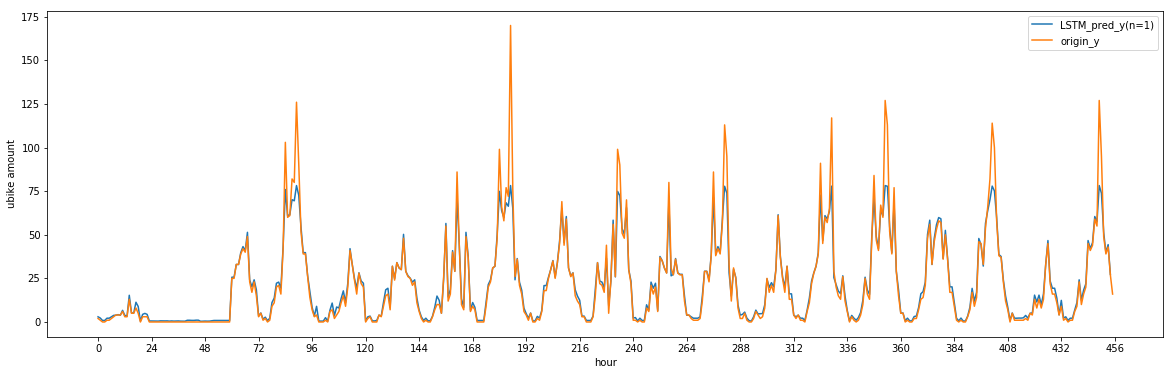

None
-------------------------------------------------
Epoch 1/100
1824/1824 [==============================] - 3s 1ms/step - loss: 1086.3907
Epoch 2/100
1824/1824 [==============================] - 1s 675us/step - loss: 840.1338
Epoch 3/100
1824/1824 [==============================] - 1s 659us/step - loss: 695.6736
Epoch 4/100
1824/1824 [==============================] - 1s 725us/step - loss: 602.8150
Epoch 5/100
1824/1824 [==============================] - 1s 743us/step - loss: 537.5996 0s - los
Epoch 6/100
1824/1824 [==============================] - 1s 757us/step - loss: 489.1505
Epoch 7/100
1824/1824 [==============================] - 1s 657us/step - loss: 451.7729
Epoch 8/100
1824/1824 [==============================] - 1s 640us/step - loss: 421.1261
Epoch 9/100
1824/1824 [==============================] - 1s 648us/step - loss: 395.0201
Epoch 10/100
1824/1824 [==============================] - 1s 632us/step - loss: 373.1435
Epoch 11/100
1824/1824 [==============================] 

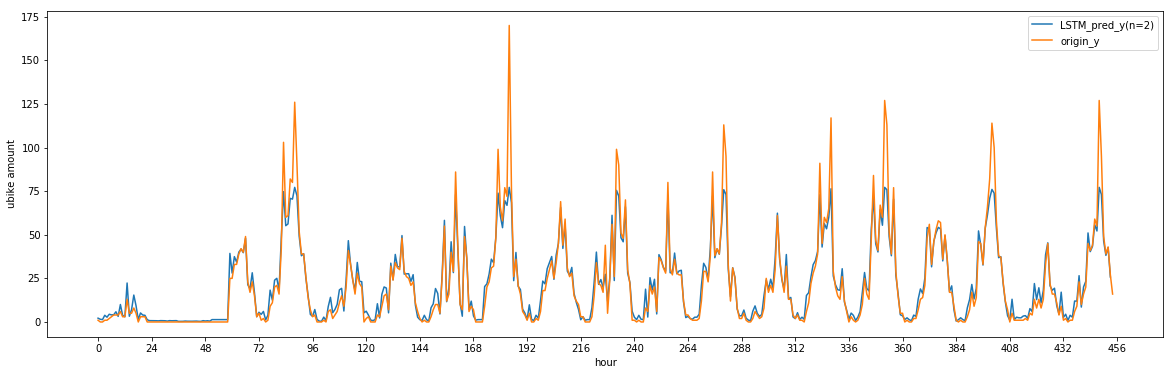

None
-------------------------------------------------


In [39]:
mse_list = []
name_count = 0
for i in df_list:
    name_count+=1
    temp = []
    for j in i:
        temp.append(j)
    temp.pop(-1)

    X_rnn = np.array(i[temp]).reshape(len(i), len(temp), 1)
    y_rnn = np.array(i.Y).reshape(len(i), 1)
    
    model = Sequential()
    model.add(LSTM(units=20, input_shape=(None,1)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_rnn[:1824], y_rnn[:1824], epochs=100, batch_size=5, verbose=1)
    y_pred_lstm = model.predict(X_rnn[1824:]).reshape(-1)
    mse = model.evaluate(X_rnn[1824:],y_rnn[1824:])
#     model.save_weights('with_rain_input_model_' + str(name_count) + '_rain_day.h5') # save weights
    print(mse)
    plt.figure(figsize=(20,6))
    plt.xticks(range(0,457,24))
    plt.xlabel('hour')
    plt.ylabel('ubike amount')
    plt.plot(y_pred_lstm, label='LSTM_pred_y(n=' + str(name_count) + ')')
    plt.plot(y_rnn[1823:], label='origin_y')
    plt.legend()
    print(plt.show())
    print('-------------------------------------------------')
    mse_list.append(mse)